### Stock Forecaster

In [1]:
from lib.forecast import StockForecaster
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# sf = StockForecaster(epochs=500,lr=0.001, hidden_size=20, gpu_device="mps")
sf.load("spydata.csv", start_at = 0)

# sf = StockForecaster(epochs=500,lr=0.001, hidden_size=20, gpu_device="mps")
# sf.load("AAPL.csv", start_at = 8600)

sf.prepare()
sf.create_model()
sf.raw_data.size

10595

In [3]:
sf.raw_data.head(4)

,Open,High,Low,Close,Volume
Date,,,,,
2015-06-22,211.910004,212.589996,211.639999,211.889999,70696000
2015-06-23,212.139999,212.440002,211.570007,212.039993,68476800
2015-06-24,211.720001,212.169998,210.470001,210.500000,92307300
2015-06-25,211.100006,211.250000,209.770004,209.860001,97107400


<Axes: xlabel='Date'>

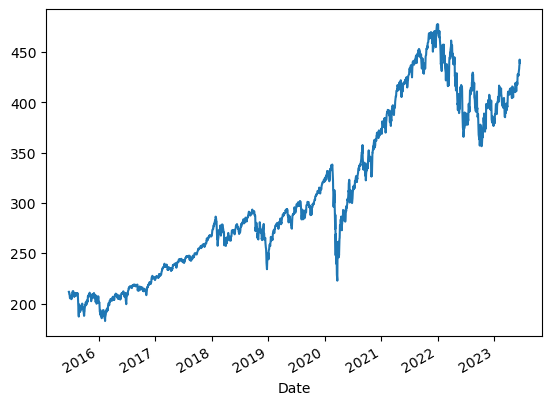

In [4]:
sf.raw_data["Close"].plot()

#### Train Model

In [5]:
loss_data, test_loss_data = sf.train()

Epoch: 0, train loss: 0.2441074550151825, test loss: 0.5152291059494019
Epoch: 100, train loss: 0.002978332806378603, test loss: 0.005413018632680178
Epoch: 200, train loss: 0.002529551275074482, test loss: 0.005385327618569136
Epoch: 300, train loss: 0.002417768817394972, test loss: 0.005274800583720207
Epoch: 400, train loss: 0.002342415973544121, test loss: 0.005331972148269415


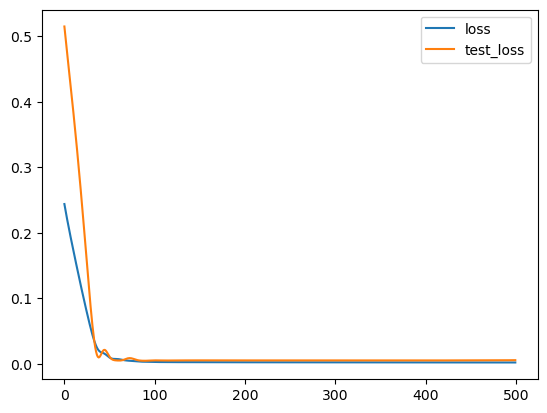

In [6]:
plt.plot(loss_data, label="loss")
plt.plot(test_loss_data, label="test_loss")
plt.legend()
plt.show()

#### Validate

<Axes: >

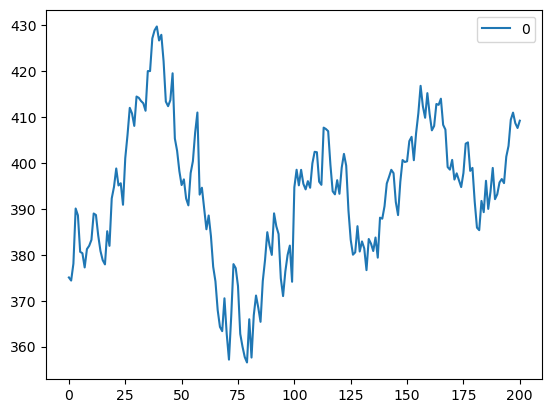

In [7]:
train_data = sf.ss.inverse_transform(sf.X_train_tensors.data.numpy()[:,0,:])[:,0]
test_data = sf.mm.inverse_transform(sf.y_test_tensors)[:,0]

train_predict = sf.lstm(sf.X_test_tensors) 
data_predict = sf.mm.inverse_transform(train_predict.data.numpy())[:,0]
pd.DataFrame(test_data).plot()

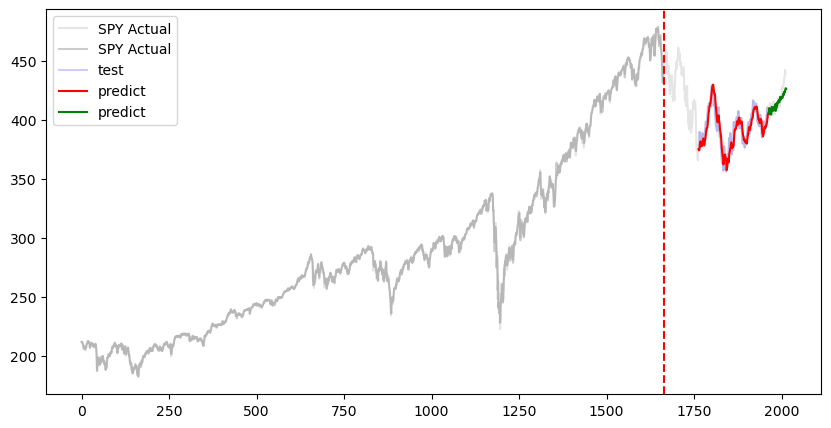

In [8]:
tdata_len = len(train_data)

plt.figure(figsize=(10,5)) #plotting

plt.plot(sf.mm.inverse_transform(sf.y_train), "k", label="SPY Actual", alpha=0.1)

plt.plot(train_data, "k", label="SPY Actual", alpha=0.2)

td = [None] * (tdata_len + 100)
td.extend(test_data)
plt.plot(td, "b", label="test", alpha=0.2)

dp = [None] * (tdata_len + 100)
dp.extend(data_predict)
plt.plot(dp, "r", label="predict")

test_predict = sf.lstm(sf.X_test_tensors[-1].unsqueeze(0)) # get the last sample
test_predict = test_predict.detach().numpy()
test_predict = sf.mm.inverse_transform(test_predict)
test_predict = test_predict[0].tolist()

dp = [None] * (tdata_len + 100 + len(data_predict))
dp.extend(test_predict)
plt.plot(dp, "g", label="predict")


plt.axvline(x=len(train_data), c='r', linestyle='--') # size of the training set

plt.legend()
plt.show()

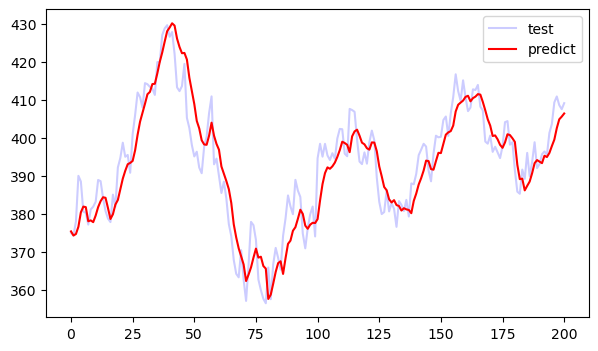

In [9]:
plt.figure(figsize=(7,4)) #plotting

td = test_data
plt.plot(td, "b", label="test", alpha=0.2)

dp = data_predict
plt.plot(dp, "r", label="predict")

plt.legend()
plt.show()

### Future Price

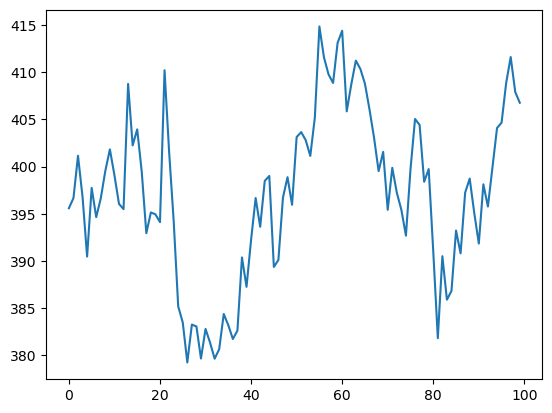

In [10]:
ds = sf.X_test_tensors[-1].unsqueeze(0)
plt.plot(sf.ss.inverse_transform(ds.detach().numpy()[0])[:, 0])

In [11]:
len(sf.X_train_tensors.data.numpy()) + len(sf.X_test_tensors.data.numpy())

1864

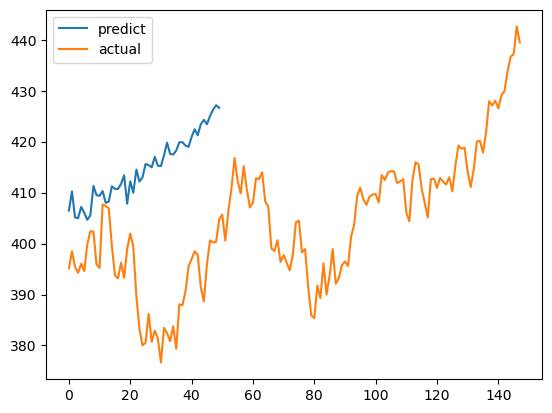

In [12]:
test_predict = sf.lstm(sf.X_test_tensors[-1].unsqueeze(0)) # get the last sample
test_predict = test_predict.detach().numpy()
test_predict = sf.mm.inverse_transform(test_predict)
test_predict = test_predict[0].tolist()

known_length = len(sf.X_train_tensors.data.numpy()) + len(sf.X_test_tensors.data.numpy())
test_target = sf.raw_data.Close[known_length:known_length+200 ].reset_index(drop=True)
# test_target = sf.y_test_tensors[-1].detach().numpy() # last sample again
# test_target = sf.mm.inverse_transform(test_target.reshape(1, -1))
# test_target = test_target[0].tolist()

plt.plot(test_predict, label="predict")
plt.plot(test_target, label="actual")
plt.legend()
plt.show()